# Descriptive Statistics

### Homework Solutions

Before you begin, remember to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

#### Standard Exercises

1. Import the `planets` dataset via the `seaborn` library and assign it to an object named `df`.

In [2]:
df = sns.load_dataset('planets')

2. Compute the **mode**, **mean** and **median** of the `distance` variable in the `df` dataframe. *Note: use the `np.nanmean()` and `np.nanmedian()` function to ignore NaN values*

In [3]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
stats.mode(df['distance'])

ModeResult(mode=nan, count=227)

In [5]:
np.nanmean(df['distance'])

264.06928217821786

In [6]:
np.nanmedian(df['distance'], )

55.25

3. Create a new DataFrame having the following specs: 
- its name is `df_stats` 
- it has shape `(1, 5)`
- populate it with the following columns `['min', 'mode', 'mean', 'median', 'max']`
- use the data from the `distance` column in the `df` dataset

In [7]:
df_stats = pd.DataFrame({
    'min': [df['distance'].min()], 
    'mode': [stats.mode(df['distance'])[0][0]], 
    'mean': [np.mean(df['distance'])], 
    'median': [np.nanmedian(df['distance'])],
    'max': [df['distance'].max()]
})
df_stats

IndexError: invalid index to scalar variable.

4. Given the DataFrame you just created, try to imagine (without the aid of a chart) how the data may be distributed. You can probably tell quite a bit, but you still need some information about its dispersion or variability. Add three more columns to the `df_stats` DataFrame `['range', 'iqr', 'stdev']` that show the variable's **range**, **interquartile range** and **standart deviation**. *Note: make sure you select the appropriate `nan_policy` and `ddof` for the `stats.iqr()` and `np.std()` functions, respectively*

In [8]:
df_stats['range'] = max(df['distance']) - min(df['distance'])
df_stats['iqr'] = stats.iqr(df['distance'], nan_policy='omit')
df_stats['stdev'] = np.std(df['distance'], ddof=1)
df_stats

NameError: name 'df_stats' is not defined

5. The `sns.stripplot()` function allows you to perform a first visual check on the distribution of continuous variables. Check out the [relative documentation](https://seaborn.pydata.org/generated/seaborn.stripplot.html) and draw a **stripplot** just for the `distance` variable. Did it match your expectations from the previous question? 

/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance'>

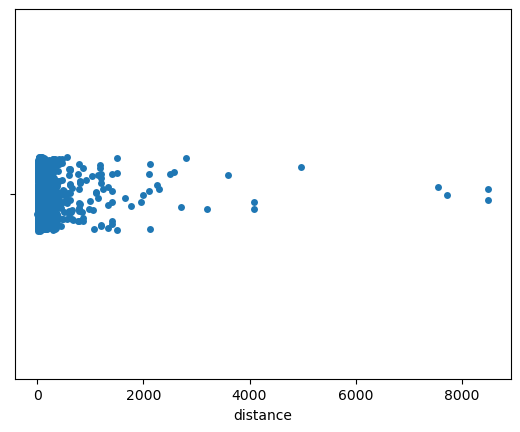

In [9]:
sns.stripplot(x = 'distance', data = df)

6. Write a function `my_median()` that, given a dataframe `df` and a column name `col` as inputs, returns the corresponding **median** value. If the input data contains NaN values, the function should be able to handle them by ignoring them. *Hint: check out the `.dropna()` method*

In [10]:
def my_median(df, col): 
    df_tmp = df.copy()
    df_tmp = df_tmp[col].dropna().sort_values()
    n = len(df_tmp)
    if n%2 == 0: 
        # n is even
        loc1 = int((n-1)/2)
        loc2 = int((n+1)/2)
        med = (df_tmp.iloc[loc1] + df_tmp.iloc[loc2])/2
    else: 
        # n is odd
        loc = int((n-1)/2)
        med = df_tmp.iloc[loc]
    return med

In [11]:
my_median(df, 'distance')

55.25

#### Advanced Exercises

1. Write a function `my_stdev()` that, given a dataframe `df` and a column name `col` as inputs, returns the corresponding **standard deviation** value. If the input data contains NaN values, the function should be able to handle them by ignoring them.

In [12]:
def my_stdev(df, col): 
    df_tmp = df.copy()
    df_tmp = df_tmp[col].dropna()
    df_tmp_m = np.mean(df_tmp)
    df_tmp_dev = [x-df_tmp_m for x in df_tmp]
    df_tmp_dev_sq = [dev**2 for dev in df_tmp_dev]
    var = sum(df_tmp_dev_sq)/(len(df_tmp)-1)
    stdev = np.sqrt(var)
    return stdev

In [13]:
my_stdev(df, 'distance')

733.1164929404423

2. Write a function `my_stat()` that, given a dataframe `df`, a column name `col` and a statistic parameter `stat` as inputs, returns the corresponding desired statistic as chosen by the user from these four possible options: `['mean', 'median', 'iqr', 'stdev']`. If the input data contains NaN values, the function should be able to handle them by ignoring them.

In [14]:
def my_stat(df, col, stat):
    df_tmp = df.copy()
    df_tmp = df_tmp[col].dropna()
    if stat == 'mean':
        return np.mean(df_tmp)
    elif stat == 'median':
        return my_median(df, col)
    elif stat == 'iqr':
        return np.percentile(df_tmp, [75]) - np.percentile(df_tmp, [25])[0]
    elif stat == 'stdev':
        return my_stdev(df, col)
    else: 
        pass

In [15]:
for s in ['mean', 'median', 'iqr', 'stdev']: 
    print(s, my_stat(df, 'distance', s))

mean 264.0692821782178
median 55.25
iqr [145.94]
stdev 733.1164929404423


3. Load up the `iris` dataset via `seaborn` and assign it to a DataFrame object with the same name. Then, using `iris.describe()`, check out all the different statistics available for the four countinuos variables in the dataset. Once you have familiarised yourself with the [differences between sepals and petals](https://biologyreader.com/difference-between-sepals-and-petals.html): 
    1. assign the output table of the `iris.describe()` statement to a new DF object named `iris_stats` 
    2. add a new **row** to the DataFrame with index `iqr` and compute the IQR for eacn column of the DF
    3. study the table and try to visualise the shape of the data according to its measures of central tendency and statistical dispersion; what can you say about the shape of this data? *(hint: feel free to select just a relevant subset of statistics from the `iris_stats` DataFrame)*
    4. visualising sets of data in your head is no joke (although it is a useful exercise!); now visualize all four numeric variables from the `iris` dataset in the same plot using the `sns.stripplot()` function; did it match your expectations from the previous question? 

In [16]:
# A. 
iris = sns.load_dataset('iris')
iris_stats = iris.describe()
iris_stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# B. 
iris_stats.loc['iqr'] = iris_stats.loc['75%']-iris_stats.loc['25%']

In [18]:
# C. 
iris_stats.loc[['mean', '50%', 'std', 'iqr']]

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.057333,3.758000,1.199333
50%,5.800000,3.000000,4.350000,1.300000
std,0.828066,0.435866,1.765298,0.762238
iqr,1.300000,0.500000,3.500000,1.500000


> There are no big differences between mean and median among each variable, meaning that there aren't many extreme values or outliers. It is interesting to note that the IQR is almost double the standard deviation for the sepal and petal length variables, meaning that those two variables may have a larger variability compared to their width counterparts. 

/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

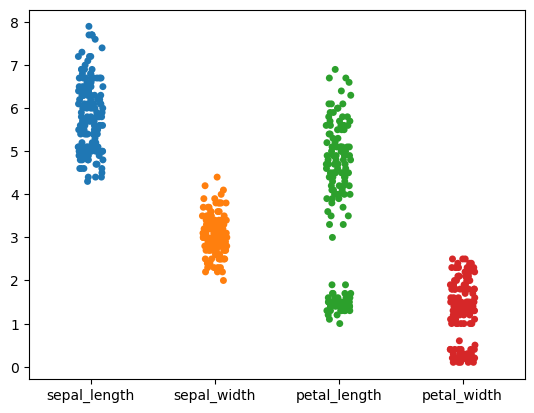

In [19]:
# D. 
sns.stripplot(data = iris)